# Fitting a Polynomial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.preprocessing import PolynomialFeatures

sns.set_style("whitegrid")

In [2]:
data = pd.read_excel("./data/dataPoly.xlsx", sheet_name='data')
data_train = pd.read_excel("./data/dataPoly.xlsx", sheet_name='dataTrain')
data_test = pd.read_excel("./data/dataPoly.xlsx", sheet_name='dataTest')
data.head()

,x,y
0,0.0108,4.9405
1,0.0693,4.7366
2,0.0201,4.9260
3,0.1152,4.6578
4,0.1370,4.5140


The DataFrame data has been split into a training set, dataTrain, and a test set, dataTest. We can generate polynomial and interaction features using the [PolynomialFeatures()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn-preprocessing-polynomialfeatures) class.

In [3]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(data_train.x.to_frame())
x_train_poly = pd.DataFrame(x_train_poly, columns=poly.get_feature_names_out())
x_train_poly.head()

,1,x,x^2
0,1.0,1.8692,3.493909
1,1.0,1.4108,1.990357
2,1.0,2.3008,5.293681
3,1.0,1.9380,3.755844
4,1.0,2.4217,5.864631


In [4]:
regressor = LinearRegression()
regressor.fit(x_train_poly, data_train.y)

LinearRegression()

In [5]:
x_test_poly = poly.transform(data_test.x.to_frame())
x_test_poly = pd.DataFrame(x_test_poly, columns=poly.get_feature_names_out())

y_pred_LR = regressor.predict(x_test_poly)
print("R^2:", regressor.score(x_test_poly, data_test.y))

R^2: 0.536563000895928


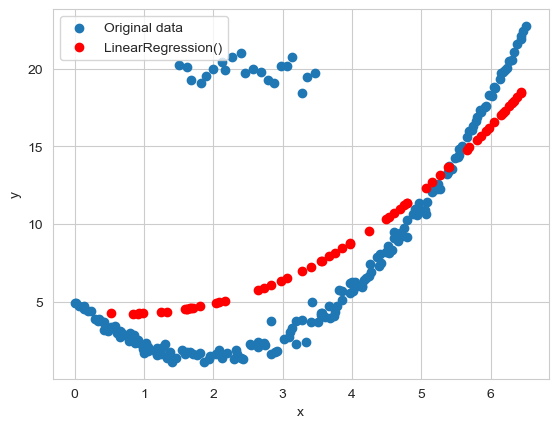

In [6]:
plt.figure()
plt.scatter(data.x, data.y)
plt.scatter(data_test.x, y_pred_LR, color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Original data", "LinearRegression()"])
plt.show()

We can see the cluster of outliers in the upper left of the plot. We can reduce the influence of the outliers on the model by using a robust linear model as [HuberRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn-linear-model-huberregressor).

In [7]:
regressor = HuberRegressor()
regressor.fit(x_train_poly, data_train.y)

HuberRegressor()

In [8]:
y_pred_HR = regressor.predict(x_test_poly)
print("R^2:", regressor.score(x_test_poly, data_test.y))

R^2: 0.45432178887796604


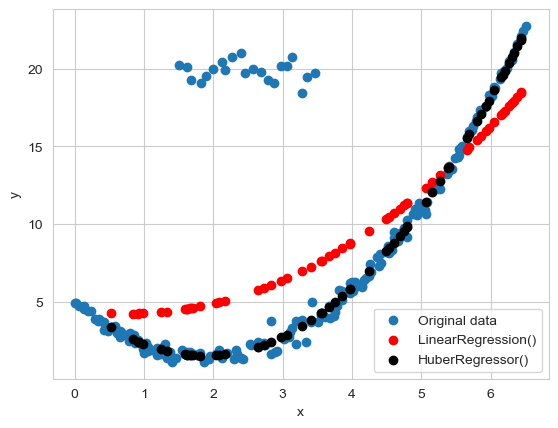

In [9]:
plt.figure()
plt.scatter(data.x, data.y)
plt.scatter(data_test.x, y_pred_LR, color='r')
plt.scatter(data_test.x, y_pred_HR, color='k')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Original data", "LinearRegression()", "HuberRegressor()"])
plt.show()